<div style="
    background: linear-gradient(to right, #1e3c45, #2e5a67);
    padding: 30px;
    border-radius: 12px;
    color: #ffffff;
    text-align: center;
    font-family: 'Helvetica Neue', sans-serif;
">
    <h1 style="margin-bottom: 10px;">✈️ Flight Ticket Price Prediction with Machine Learning</h1>
    <p style="font-size: 18px;"><strong>Author:</strong> Olukayode Daniel</p>
    <p style="font-size: 18px;"><strong>Date:</strong> June 2025</p>
    <p style="font-size: 18px;">
        <strong>GitHub:</strong> 
        <a href="https://github.com/Olukayode-Daniel11/DS-Projects-Portfolio.git" style="color: #87cefa;" target="_blank">
            github.com/Olukayode-Daniel11/DS-Projects-Portfolio
        </a>
    </p>
</div>


<div style="background-color: #e6f7ff; padding: 20px; border-radius: 10px; color: #000000; font-size: 16px; line-height: 1.6;">

<h4 style="margin-top: 0;">📘 <strong>PROBLEM STATEMENT:</strong></h4>
<p>
Flight ticket prices can be something hard to guess. Today we might see a price, check out the price of the same flight tomorrow, it will be a different story.
We might have often heard travelers saying that flight ticket prices are so unpredictable.
That’s why we need to employ machine learning to solve this problem.
This can relatively help airlines by predicting what prices they can maintain to increase customer retention and satisfaction.
</p>

<h4>🎯 <strong>PROJECT OBJECTIVE:</strong></h4>
<p>
The objective of this project is to conduct and present a full data analysis report on the flight fare data and most importantly create a predictive model which will help customers predict future flight prices and plan their journey accordingly.
</p>

<h4>🧾 <strong>PROJECT SUMMARY:</strong></h4>
<p>
This project focuses on full exploratory data analysis (EDA) of flight fare data to uncover meaningful patterns and trends that influence flight prices.
Due to the challenges of uncertainty in flight ticket prices being faced by airline customers in India which is currently taking a toll on customers' travel plans,
the ultimate goal of this project is to prepare the flight fare dataset for modeling flight fare prediction in order to help bridge the gap between airlines maintaining customer-friendly prices
and customers estimating flight fares in order to plan their trips accordingly.
</p>

</div>


In [44]:
!pip install xgboost

In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
import warnings
import datetime as dt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import pickle
from sklearn.pipeline import Pipeline
%matplotlib inline
warnings.filterwarnings('ignore')

In [237]:
df = pd.read_excel('Flight_Fare.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [239]:
df.shape

(10683, 11)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [243]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [245]:
df.duplicated().sum()

220

In [247]:
duplicates =df[df.duplicated(subset=['Price'], keep=False)]
duplicates

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229


In [249]:
# Viewed sample duplicates

duplicates = df[df.duplicated()]
duplicates.head(20)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
1685,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 10 May,13h 30m,2 stops,No info,15129
1704,IndiGo,09/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,6860
1807,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 02 Jun,21h 40m,2 stops,In-flight meal not included,10919
1891,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,In-flight meal not included,10368
1971,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,04:25 11 May,29h 20m,2 stops,No info,15129


In [747]:
#Applied the pd.set_option to manually investigate if what df.duplicated().sum() is showing as duplicate records are
#actually duplicate records considering the kind of dataset(Flight_fare) we are working on from the Aviation domain.

pd.set_option('display.max_rows',None)
duplicates =df[df.duplicated(subset=['Price'], keep=False)]

In [255]:
#Checked the exact location of [Route] column's null value.

df.loc[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [257]:
#Checked the exact location of [Total_Stops] column's null value.

df.loc[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [261]:
# Converted the date and time columns from object dtype to datetime dtype

df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

# Verification of the conversion of dtypes

print(df[['Date_of_Journey', 'Dep_Time', 'Arrival_Time',]].dtypes)

Date_of_Journey    datetime64[ns]
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
dtype: object


In [265]:
# Function to standardize the Duration format
def convert_duration(duration):
    """
    The convert_duration function in this block of code is used to appropriately standardize
    the duration column format by converting all Duration column values to a proper timedelta
    format and ensuring that all Duration values contain both hours and minutes.

    """
    duration = duration.strip()
    if 'h' not in duration:
        duration = '0h ' + duration
    if 'm' not in duration:
        duration = duration + ' 0m'
    return duration

# Apply the standardization
df['Duration'] = df['Duration'].apply(convert_duration)

# Split into hours and minutes, then convert to timedelta
df['Duration'] = pd.to_timedelta(df['Duration'].str.replace('h', ' hours').str.replace('m', ' minutes'))

In [267]:
# Verified the conversion of 'Duration' column from object dtype to timedelta dtype

print(df['Duration'].dtypes)

timedelta64[ns]


In [269]:
print(df['Duration'].head())

0   0 days 02:50:00
1   0 days 07:25:00
2   0 days 19:00:00
3   0 days 05:25:00
4   0 days 04:45:00
Name: Duration, dtype: timedelta64[ns]


In [271]:
# Extracted [Dep_hour], [Dep_Min], [Arrival_Hour] and [Arrival_Min] from 'Dep_Time' column and 'Arrival_Time' column.

df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Min'] = df['Dep_Time'].dt.minute

df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Min'] = df['Arrival_Time'].dt.minute

# Convert duration to total minutes

df['Duration_minutes'] = df['Duration'].dt.total_seconds() // 60

In [273]:
#Verification of Datatypes Conversion

df.dtypes

Airline                      object
Date_of_Journey      datetime64[ns]
Source                       object
Destination                  object
Route                        object
Dep_Time             datetime64[ns]
Arrival_Time         datetime64[ns]
Duration            timedelta64[ns]
Total_Stops                  object
Additional_Info              object
Price                         int64
Dep_Hour                      int32
Dep_Min                       int32
Arrival_Hour                  int32
Arrival_Min                   int32
Duration_minutes            float64
dtype: object

In [275]:
# Extracted relevant date components from 'Date_of_Journey' column such as [Journey_day], [Journey_month], 
# and Journey_Weekday that would better improve model performance. By doing this the best model for this data can better
#learn about prices that may flunctuate by month or season and also learn if prices are often higher during 
#weekends or weekdays. All of these date components extracted from the intial 'Date_of_Journey' column will simply contribute immensely
#to improving model performance.

df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_Weekday'] = df['Date_of_Journey'].dt.weekday  # Monday = 0, Sunday = 6

In [277]:
# Dropped the original/initial datetime and timedelta columns to remove clutter from the dataset.

df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], axis=1, inplace=True)

In [280]:
#Checked the Dtype of the newly engineered columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  object 
 1   Source            10683 non-null  object 
 2   Destination       10683 non-null  object 
 3   Route             10682 non-null  object 
 4   Total_Stops       10682 non-null  object 
 5   Additional_Info   10683 non-null  object 
 6   Price             10683 non-null  int64  
 7   Dep_Hour          10683 non-null  int32  
 8   Dep_Min           10683 non-null  int32  
 9   Arrival_Hour      10683 non-null  int32  
 10  Arrival_Min       10683 non-null  int32  
 11  Duration_minutes  10683 non-null  float64
 12  Journey_Day       10683 non-null  int32  
 13  Journey_Month     10683 non-null  int32  
 14  Journey_Weekday   10683 non-null  int32  
dtypes: float64(1), int32(7), int64(1), object(6)
memory usage: 959.9+ KB


In [283]:
df.loc[df['Route'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_minutes,Journey_Day,Journey_Month,Journey_Weekday
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480,9,45,9,25,1420.0,6,5,0


In [287]:
#Null Values handling was done by replacing the Null Value in the 'Route' Column with the MODE.

df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

In [289]:
#Double checked if Null Values still exists in the dataset

df.loc[df['Route'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_minutes,Journey_Day,Journey_Month,Journey_Weekday


In [291]:
#Checked the exact location of [Total_Stops] column's null value.

df.loc[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_minutes,Journey_Day,Journey_Month,Journey_Weekday
9039,Air India,Delhi,Cochin,DEL → BOM → COK,NaN,No info,7480,9,45,9,25,1420.0,6,5,0


In [293]:
#Null Values handling was done by replacing the Null Value in the 'Total_Stops' Column with the MODE.

df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [295]:
#Double checked if Null Values still exists in the dataset

df.loc[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_minutes,Journey_Day,Journey_Month,Journey_Weekday


In [297]:
#Restored the display of the dataset to default

pd.reset_option('display.max_rows',None)

In [153]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_minutes,Journey_Day,Journey_Month,Journey_Weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,170.0,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,445.0,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,1140.0,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,325.0,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,285.0,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,19,55,22,25,150.0,9,4,1
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,20,45,23,20,155.0,27,4,5
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,8,20,11,20,180.0,27,4,5
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,11,30,14,10,160.0,1,3,4


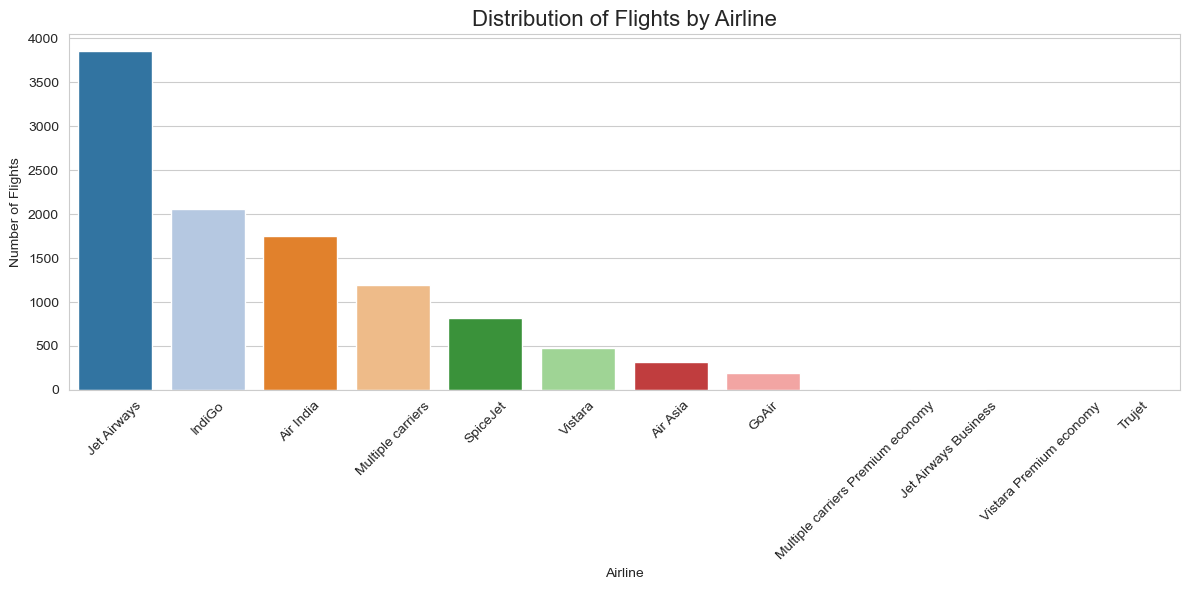

In [419]:
#UNIVARIATE ANALYSIS FOR AIRLINE COLUMN

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index, palette='tab20')
plt.title('Distribution of Flights by Airline', fontsize=16)
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2><b>Airline Column Analysis</b></h2>

<p style="font-size:15px">
The <b>Airline</b> column represents the name of the airline operating each flight. The univariate analysis conducted on the <b>Airline</b> column shows a clear disparity in flight frequency across different airlines. The most frequently occurring airlines in the dataset include <b>Jet Airways</b>, <b>IndiGo</b>, and <b>Air India</b>, suggesting that these carriers dominate the routes represented in the dataset. In contrast, airlines like <b>Jet Airways Business</b>, <b>Vistara Premium Economy</b>, and <b>Trujet</b> have significantly fewer entries, indicating they are less commonly used by passengers or serve fewer routes. The essence of this analysis is to observe how the Airline distribution can influence pricing trends and model behavior based on airline popularity.
</p>

In [302]:
#Breaking down the number of flight trips per Airline recorded in the dataset

df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

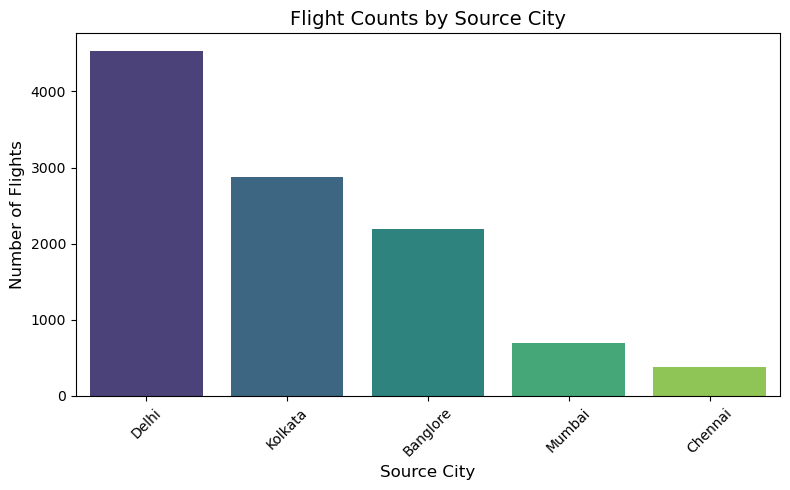

In [305]:
#UNIVARIATE ANALYSIS FOR SOURCE COLUMN

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Source', order=df['Source'].value_counts().index, palette='viridis')
plt.title('Flight Counts by Source City', fontsize=14)
plt.xlabel('Source City', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2><b>Source Column Analysis</b></h2>

<p style="font-size:15px">
The <b>Source</b> column indicates the city from which the flight originates. The Univariate analysis conducted reveals that the majority of flights in the dataset originate from <b>Delhi</b> and <b>Kolkata</b>, making them the most prominent departure points. <b>Banglore</b> and <b>Mumbai</b> follow with moderate frequencies, while <b>Chennai</b> contributes the fewest number of flights. This distribution highlights the dominance of certain metro cities as key flight origins, which could influence pricing dynamics and travel demand patterns in the dataset.
</p>

In [308]:
df['Source'].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

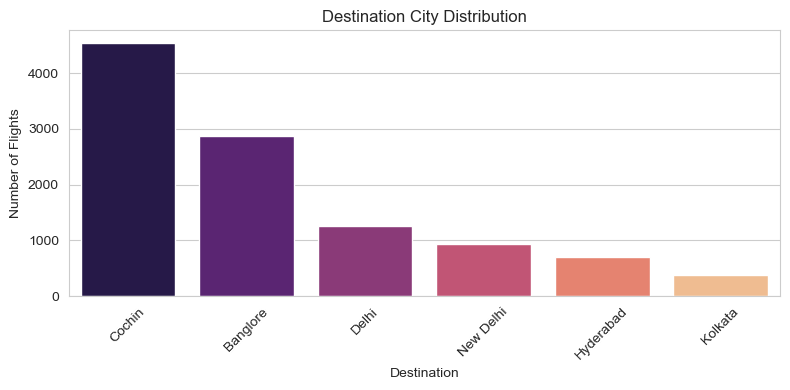

In [409]:
#UNIVARIATE ANALYSIS FOR DESTINATION COLUMN

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Destination', order=df['Destination'].value_counts().index, palette="magma")
plt.title('Destination City Distribution')
plt.xlabel('Destination')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2><b>Destination Column Analysis</b></h2>

<p style="font-size:15px">
The <b>Destination</b> column represents the city where each flight is headed. The univariate analysis shows that <b>Cochin</b> is the most frequently visited destination in the dataset, followed by <b>Banglore</b> and <b>Delhi</b>. While <b>Kolkata</b> appears to be the least visited destination followed by <b>Hyderabad</b> and <b>New Delhi</b>. This suggests that there is higher flight frequency or demand towards <b>Cochin</b>, <b>Banglore</b> and <b>Delhi</b>.
</p>

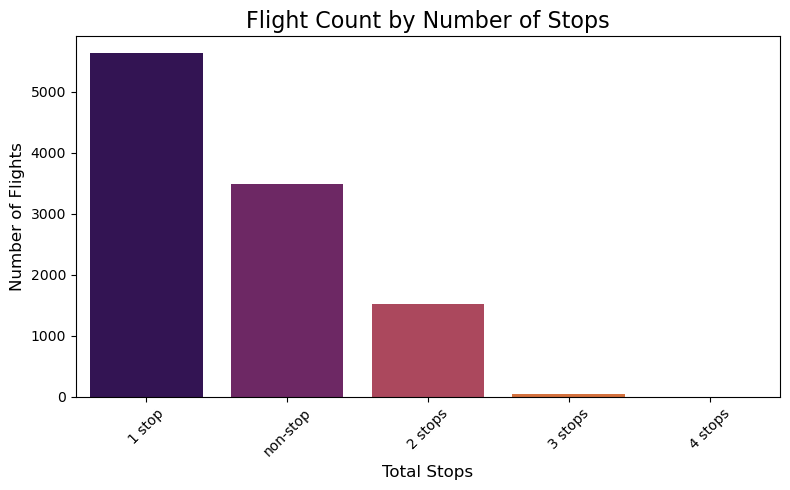

In [315]:
#UNIVARIATE ANALYSIS FOR TOTAL STOPS COLUMN

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Total_Stops', order=df['Total_Stops'].value_counts().index, palette='inferno')
plt.title("Flight Count by Number of Stops", fontsize=16)
plt.xlabel("Total Stops", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2><b>Total_Stops Column Analysis</b></h2>

<p style="font-size:15px">
The <b>Total_Stops</b> column represents the number of stops a flight has between its source and destination. The univariate analysis on Total_stops reveals that most flights are either <b>non-stop</b> or have <b>1 stop</b>. As the number of stops increases, the frequency of flights decreases significantly, indicating that <b>direct(non-stop)flights</b> and <b>1-stop flights</b> are the most common and possibly the most preferred by passengers.
</p>

In [318]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [321]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [323]:
# Standardized to lowercase because of the (no info & No Info)parameters repeated with conflicting character cases.

df['Additional_Info'] = df['Additional_Info'].str.lower()

In [325]:
# Checked the updated unique values and their counts

df['Additional_Info'].value_counts()

Additional_Info
no info                         8348
in-flight meal not included     1982
no check-in baggage included     320
1 long layover                    19
change airports                    7
business class                     4
1 short layover                    1
red-eye flight                     1
2 long layover                     1
Name: count, dtype: int64

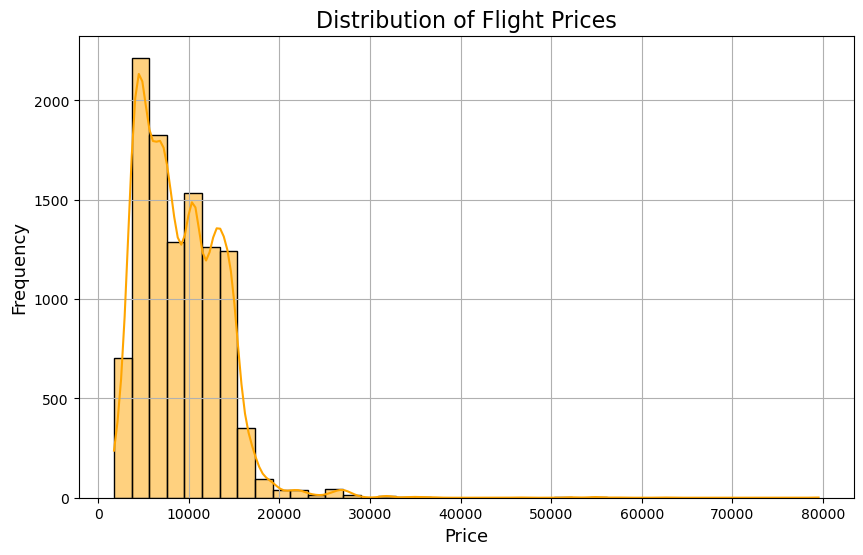

In [346]:
#UNIVARIATE ANALYSIS FOR PRICE(target)COLUMN

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=40, kde=True, color='orange')
plt.title('Distribution of Flight Prices', fontsize=16)
plt.xlabel('Price', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)
plt.show()

In [333]:
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

<h2><b>Price Column Analysis</b></h2>

<p style="font-size:15px">
The <b>Price</b> column captures the cost of flight tickets in the dataset. The univariate analysis reveals a right-skewed distribution, with most flights priced on the lower end. A small number of high-value tickets push the tail of the distribution to the right. The summary statistics indicate a wide range in ticket prices, which may be influenced by various factors such as airline, number of stops, travel duration, or booking class. This distribution suggests the presence of outliers and pricing diversity, which are expected in real-world flight data.
</p>

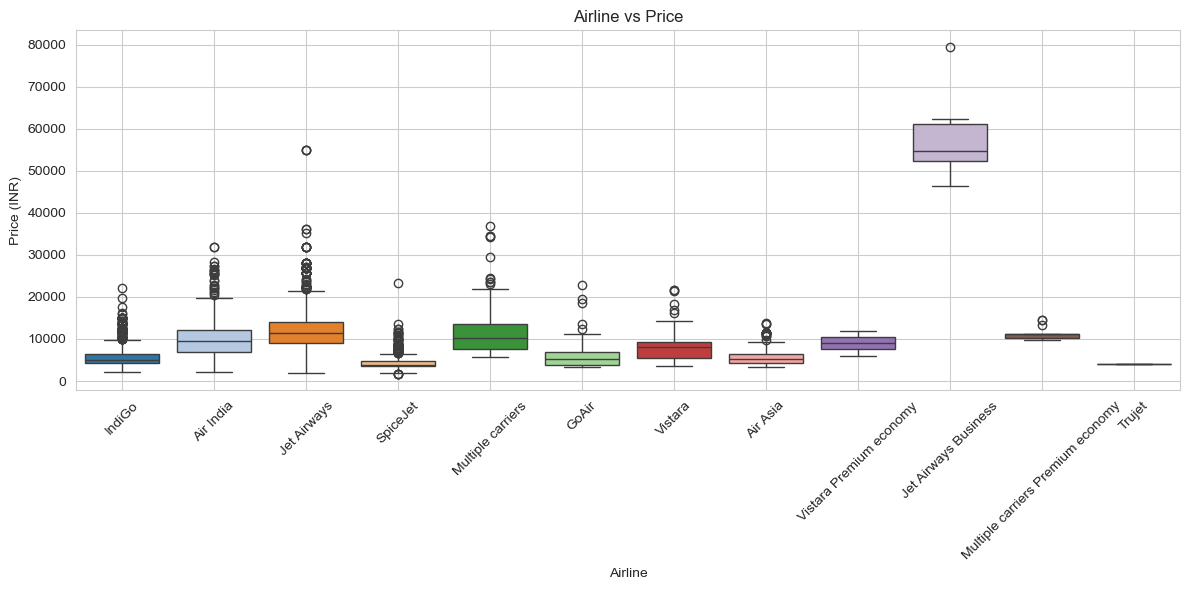

In [427]:
#BIVARIATE ANALYSIS PLOT FOR AIRLINE vs PRICE

plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=df, palette='tab20')
plt.xticks(rotation=45)
plt.title('Airline vs Price')
plt.ylabel('Price (INR)')
plt.xlabel('Airline')
plt.grid(True)
plt.tight_layout()
plt.show()

# <span style="font-size:22px; font-weight:bold">Airline vs Price Analysis</span>

The boxplot comparison between **Airline** and **Price** shows clear variability in pricing structures across different carriers. 

- **Jet Airways** appears to have the **widest price range** with many high-priced outliers, indicating it likely offers premium or business class options.
- **Air India** and **IndiGo** fall into a **moderate price range**, showing more consistency in ticket fares.
- **SpiceJet**, **GoAir**, and **Vistara** generally offer **lower-priced** tickets, making them budget-friendly options.
- Outliers are noticeable for most airlines, especially Jet Airways, suggesting high variance in ticket types and service classes.

This analysis confirms that **Airline choice significantly influences ticket prices**, making it a critical predictor in our model.


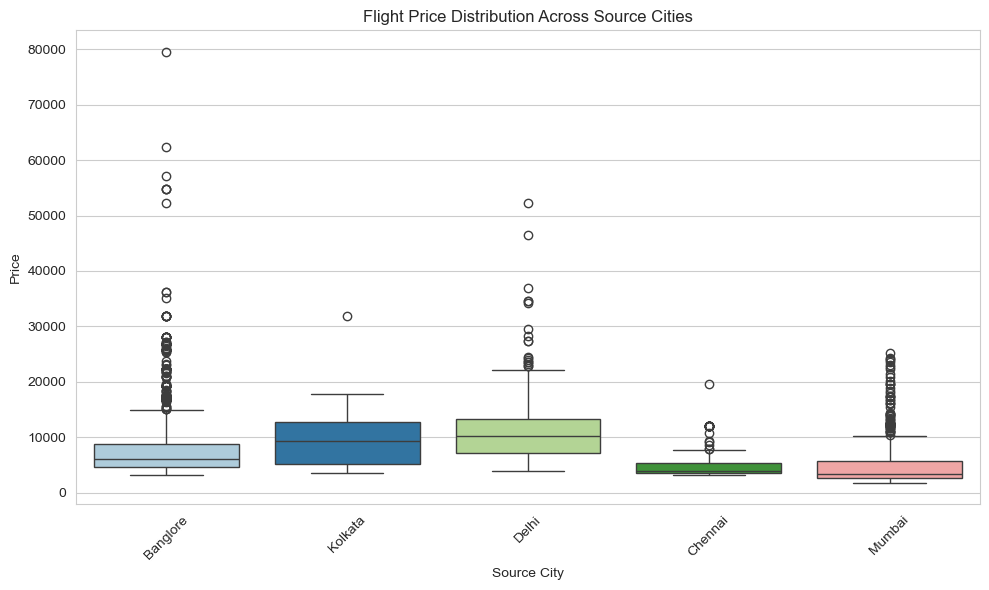

In [425]:
#BIVARIATE ANALYSIS DISTRIBUTION FOR SOURCE vs PRICE

plt.figure(figsize=(10,6))
sns.boxplot(x='Source', y='Price', data=df, palette='Paired')
plt.title('Flight Price Distribution Across Source Cities')
plt.xlabel('Source City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bivariate Analysis: Source vs Price

The boxplot reveals how flight prices differ across various source cities. Here's a summary of insights:

- **Delhi** shows a wide range in ticket pricing, indicating it offers both budget and premium flights.
- **Kolkata** tends to have a tighter price distribution with lower median values, suggesting more economical flight options.
- **Mumbai** and **Chennai** show moderate spreads, indicating a mid-tier pricing structure.
- **Banglore** displays a relatively broader spread in prices but not as wide as Delhi.

This analysis helps us understand how the departure city can influence the pricing of flights, offering useful patterns for modeling and consumer segmentation.


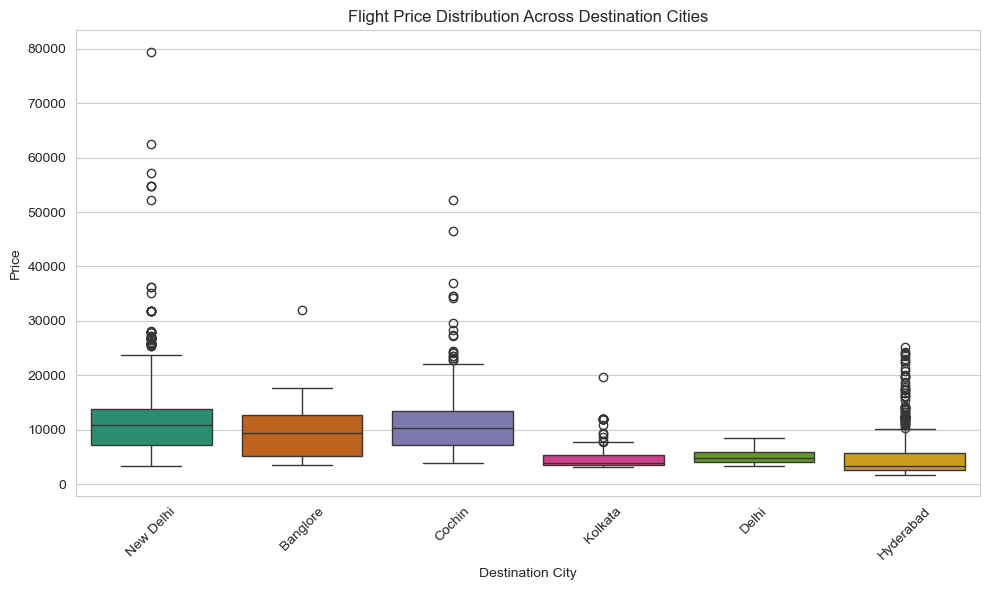

In [431]:
#BIVARIATE ANALYSIS FOR DESTINATION vs PRICE

plt.figure(figsize=(10,6))
sns.boxplot(x='Destination', y='Price', data=df, palette='Dark2')
plt.title('Flight Price Distribution Across Destination Cities')
plt.xlabel('Destination City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bivariate Analysis: Destination vs Price

The boxplot comparing destinations against flight prices provides the following insights:

- **Hyderabad** and **Kolkata** tend towards a more affordable and less varied pricing options for customers.

- **Cochin**: Displays a **wide interquartile range (IQR)** and **long whiskers**, suggesting **high variability** in flight pricing. This destination likely hosts a mix of low-cost and premium flights.

- **Banglore**: The box and whiskers are **compact**, reflecting a **tight and stable price distribution**. Flights to Banglore are generally priced within a consistent range.

- **Delhi**: The boxplot for Delhi has a **narrow IQR**, **short whiskers**, and minimal to no outliers. This indicates that flight prices to Delhi are **stable and tightly grouped**, with very little variability.

- **New Delhi**: In contrast, New Delhi exhibits a **moderately wide IQR** with **a long upper whisker** and **numerous high-value outliers**, some reaching up to ₹80,000. This suggests:
  - A **broad range** of pricing,
  - Presence of **premium-priced flights**, and
  - Greater **pricing volatility** compared to Delhi.
  - The concentration of outliers on the upper end implies occasional expensive flight options possibly driven by class, demand, or duration.

### Conclusion:
- **New Delhi** shows **significant price dispersion** and **many high-value outliers**, making it a destination with **unpredictable and premium-prone pricing**.
- This contrasts with **Delhi**, where pricing is much more **uniform and predictable**.

In [377]:
# Saved a copy of the refined Flight_Fare dataset in Excel.

df.to_excel('Flight_Fare.xlsx', index=False)

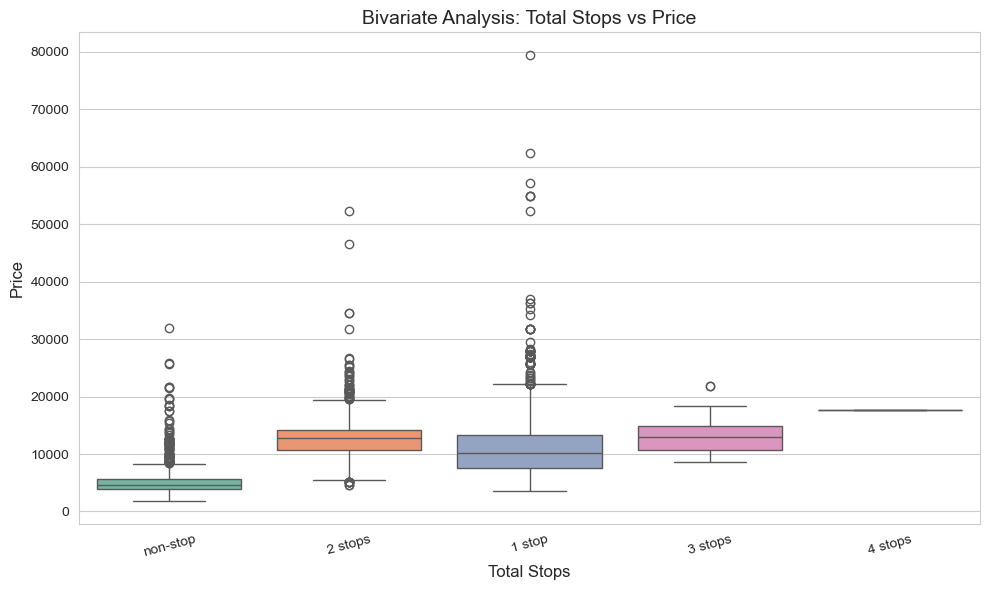

In [383]:
#BIVARIATE ANALYSIS FOR TOTAL STOPS vs PRICE

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.boxplot(x='Total_Stops', y='Price', data=df, palette='Set2')

plt.title('Bivariate Analysis: Total Stops vs Price', fontsize=14)
plt.xlabel('Total Stops', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## Bivariate Analysis: Total_Stops vs Price

- **Direct Flights (Non-stop)**: These have the **lowest median prices** with a **narrow price range**, indicating consistent pricing with minimal variation. This makes sense as non-stop flights are often shorter and more predictable in cost.

- **1 Stop Flights**: Prices begin to increase here, and we observe a **slightly wider interquartile range (IQR)**. This suggests price variability due to different layover durations or airline service levels.
- **2 Stops Flights**: Wider IQR and increased outliers suggest more variation in pricing, these flights tend to vary greatly depending on route complexity, carrier, and layover time..
- **3 Stops Flights**: Despite the number of stops, the price range remains relatively narrow with minimal outliers, indicating stable but less frequent pricing.
- **4 Stops Flights**: Extremely limited data. No visible box or range in the boxplot, suggesting very few flights with this configuration — not statistically significant for broader pricing analysis.

### Conclusion:

Overall, the number of stops influences not just the **price**, but also the **price consistency**. Fewer stops generally lead to lower and more predictable prices, while increased stops introduce greater variability — except in rare categories like 4 stops where data is sparse.

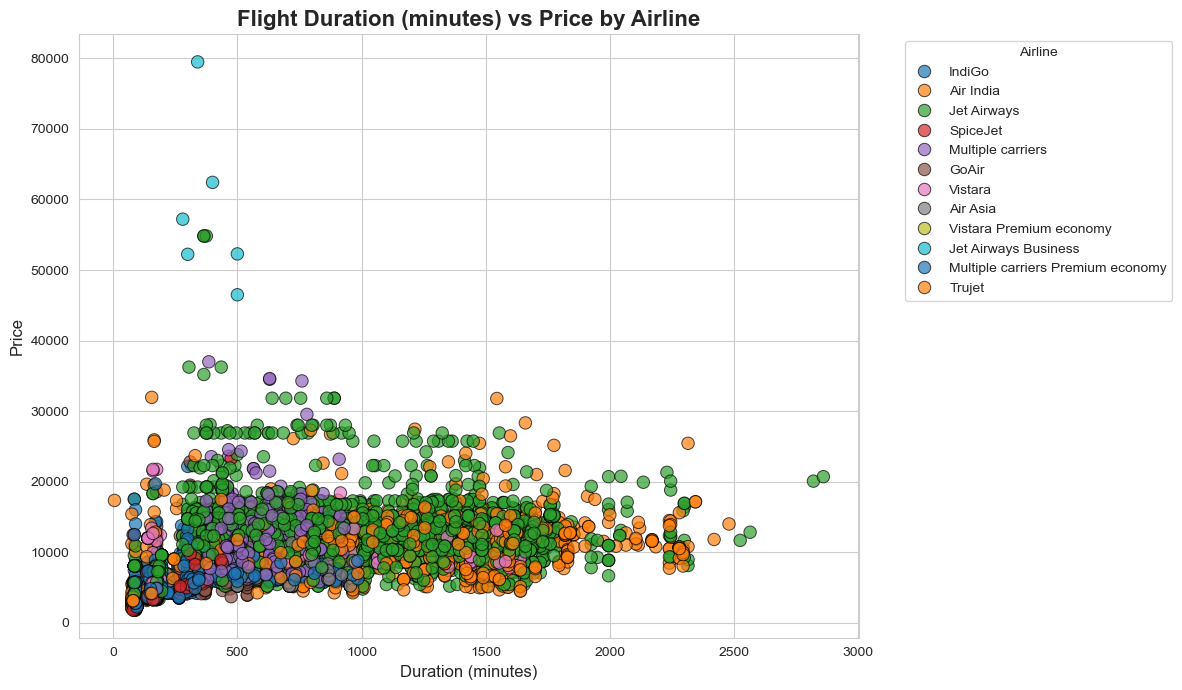

In [399]:
#BIVARIATE ANALYSIS FOR DESTINATION_MINUTES vs PRICE

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Created a colorful scatterplot using the 'Airline' as the hue
sns.scatterplot(
    data=df,
    x='Duration_minutes',
    y='Price',
    hue='Airline',
    palette='tab10',   
    alpha=0.7,
    s=80,              
    edgecolor='black'  
)

plt.title('Flight Duration (minutes) vs Price by Airline', fontsize=16, weight='bold')
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Bivariate Analysis: Duration vs Price

This analysis explores the relationship between the total Flight Duration (in minutes) and ticket price.

### Key Observations:

- The scatter plot displays a **moderate positive correlation** between `Duration_minutes` and `Price`, meaning that **longer flights tend to cost more**, though the relationship is not strictly linear.
- There is **visible spread** at shorter durations, indicating that **some short flights still have high prices**, possibly due to demand, fewer stops, or premium airlines.
- **Outliers** are present in both short and long durations, suggesting that pricing is influenced by **multiple factors** beyond just flight features—such as airline, number of stops, and route popularity.

### Conclusion
This insight is an important one for pricing strategy and traveler value analysis, especially for budget-conscious flyers comparing flight durations against price trade-offs.

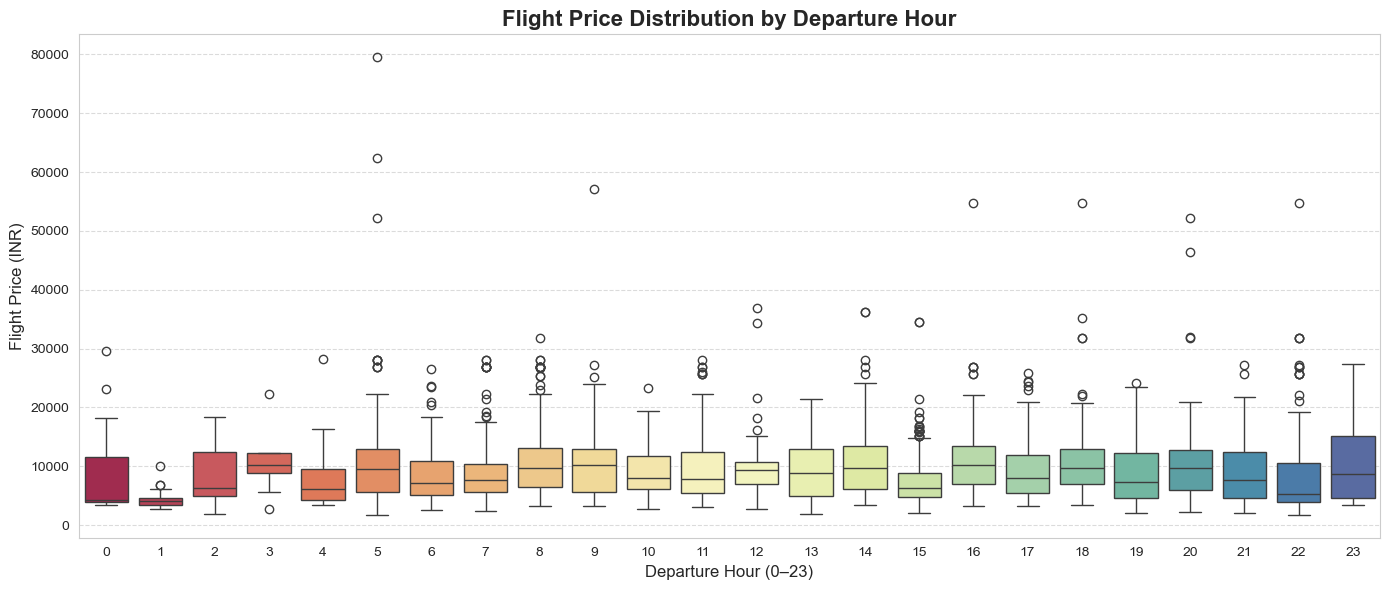

In [442]:
# BIVARIATE ANALYSIS OF DEPARTURE HOUR vs PRICE

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df, 
    x='Dep_Hour', 
    y='Price', 
    palette='Spectral'  # Colorful palette
)
plt.title('Flight Price Distribution by Departure Hour', fontsize=16, fontweight='bold')
plt.xlabel('Departure Hour (0–23)', fontsize=12)
plt.ylabel('Flight Price (INR)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Bivariate Analysis: Dep_Hour vs Price

This analysis examines how flight prices vary based on the **hour of departure** throughout the day.

### Key Observations:

- **Early morning departures (0–6 AM)** tend to show relatively **moderate prices**, with fewer outliers and a more compact price range.
- **Midday to evening hours (10 AM–6 PM)** generally display **higher price variability**, with broader interquartile ranges and frequent outliers. This could correspond to peak business travel periods.
- **Late night departures (after 9 PM)** show a **moderate-to-low price range**, possibly due to reduced passenger demand.
- Some **distinct price peaks** appear around **9 AM and 6 PM**, indicating those may be premium time slots.
  
### Insights:

- **Departure hour influences pricing**, and travelers could save money by selecting off-peak departure times.
- This insight could help **airlines refine pricing strategies** and assist **passengers in choosing cost-effective flight schedules**.

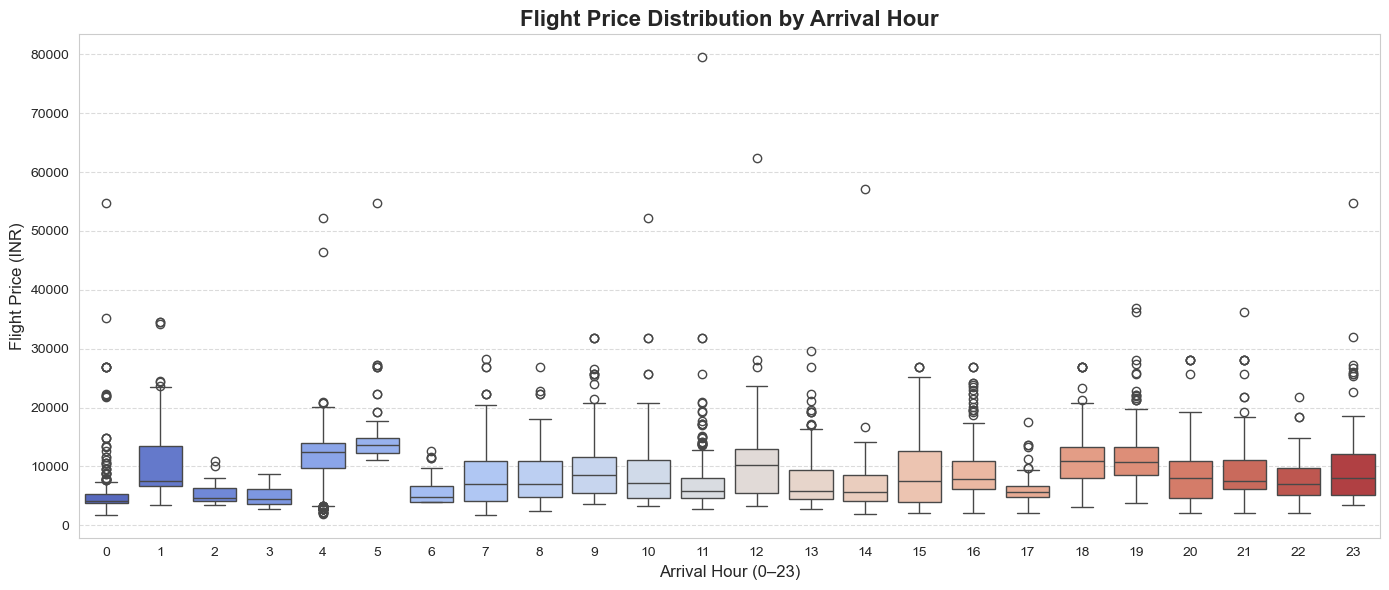

In [444]:
# BIVARIATE ANALYSIS OF ARRIVAL_HOUR vs PRICE

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df, 
    x='Arrival_Hour', 
    y='Price', 
    palette='coolwarm'  # Colorful and visually engaging
)
plt.title('Flight Price Distribution by Arrival Hour', fontsize=16, fontweight='bold')
plt.xlabel('Arrival Hour (0–23)', fontsize=12)
plt.ylabel('Flight Price (INR)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Bivariate Analysis: Arrival_Hour vs Price

This analysis explores how flight prices are influenced by the **hour of arrival**.

### Key Observations:

- **Late night arrivals (0–5 AM)** typically show **moderate prices with a narrow range**, possibly reflecting low demand.
- **Morning arrivals (6–11 AM)** have a **slightly wider price distribution**, but still relatively affordable.
- **Afternoon and early evening hours (12–18)** show a **broader range of prices**, suggesting a mix of high-demand and low-cost flight segments.
- **Late evening arrivals (19–23)** show **moderate to high variability**, with visible outliers indicating higher fare spikes during certain times.
  
### Insights:

- **Arrival time is a useful feature** when predicting flight prices — higher prices tend to cluster around business-travel preferred arrival hours (e.g., mid-morning and early evening).
- Understanding arrival-time pricing patterns may help optimize travel plans and offer **personalized recommendations** to price-sensitive travelers.

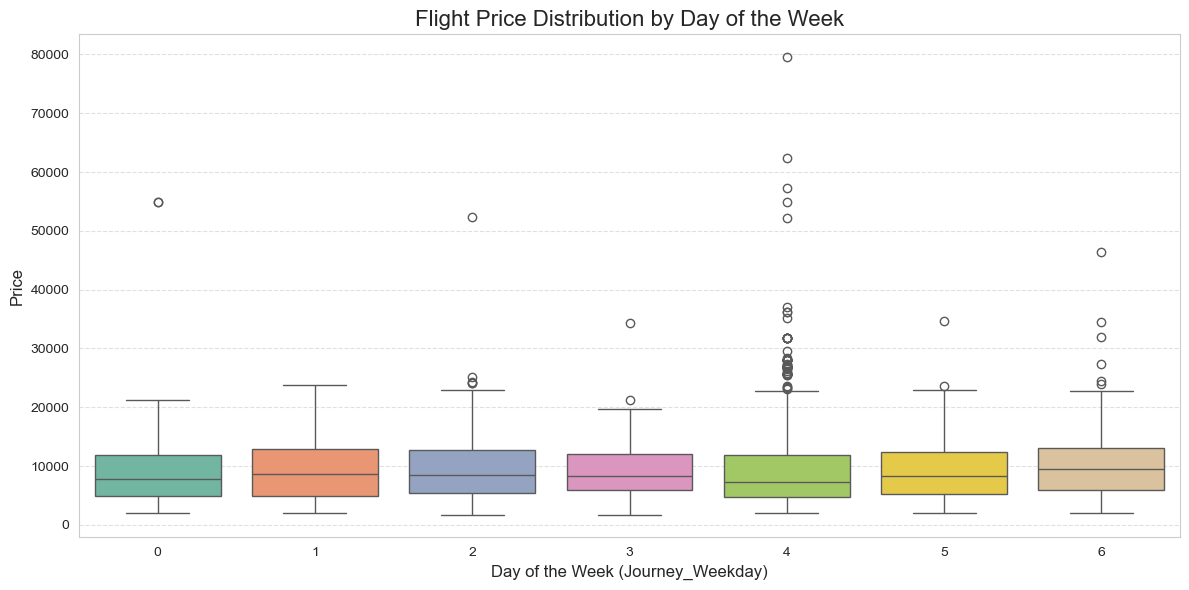

In [454]:
# BIVARIATE ANALYSIS DISTRIBUTION OF JOURNEY_WEEKDAY vs PRICE.

plt.figure(figsize=(12, 6))
sns.boxplot(x='Journey_Weekday', y='Price', data=df, palette='Set2')
plt.title('Flight Price Distribution by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week (Journey_Weekday)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Journey_Weekday vs Price Analysis

This bivariate analysis explores how flight prices vary by the **day of the week**:

### Insight:
While **Monday** and **Tuesday** offer relatively cheaper and stable flight prices, prices increase gradually through the week, peaking around **Friday**, **Saturday**, and **Sunday**. Saturday, in particular, shows higher price variability than initially assumed, debunking the idea of it being a low-volume, low-cost travel day. This weekday pricing behavior is valuable for dynamic pricing strategies and trip planning.

In [461]:
# OUTLIER HANDLING IN THE PRICE COLUMN

# Calculating quartiles
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

In [463]:
# Calculating IQR

IQR = Q3 - Q1
IQR

7096.0

In [465]:
# Defined lower and upper bounds

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [469]:
upper_bound

23017.0

In [473]:
# Calculated the percentage of outliers in the PRICE column
# to see whether we will be handling the outliers in the PRICE column or not.

len(df.loc[df['Price']>upper_bound])/len(df)*100

0.8799026490686137

In [475]:
len(df.loc[df['Price']<lower_bound])/len(df)*100

0.0

In [477]:
df['Price'].median()

8372.0

In [479]:
#Based on the total percentage result(0.87) of Outliers in the PRICE column,
#We handled the outliers by replacing them with the MEDIAN value of the PRICE column
#with respect to the right-skewed distribution of the PRICE column.

df.loc[df['Price']>upper_bound, 'Price'] = df['Price'].median()

In [487]:
df.max()

Airline             Vistara Premium economy
Source                               Mumbai
Destination                       New Delhi
Route                             MAA → CCU
Total_Stops                        non-stop
Additional_Info              red-eye flight
Price                                 23001
Dep_Hour                                 23
Dep_Min                                  55
Arrival_Hour                             23
Arrival_Min                              55
Duration_minutes                     2860.0
Journey_Day                              27
Journey_Month                             6
Journey_Weekday                           6
dtype: object

In [489]:
# Dropped the [Route]column because if feels redundant with the [Total_Stops]column.
# The number of segments in a 'Route' string already indirectly conveys the number of stops, 
# which is captured cleanly in [Total_Stops]column.

df.drop('Route', axis=1, inplace=True)

In [493]:
df.drop(['Dep_Min', 'Arrival_Min'], axis=1, inplace=True)

In [623]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Dep_Hour,Arrival_Hour,Duration_minutes,Journey_Day,Journey_Month,Journey_Weekday
0,IndiGo,Banglore,New Delhi,non-stop,no info,3897,22,1,170.0,24,3,6
1,Air India,Kolkata,Banglore,2 stops,no info,7662,5,13,445.0,1,5,2
2,Jet Airways,Delhi,Cochin,2 stops,no info,13882,9,4,1140.0,9,6,6
3,IndiGo,Kolkata,Banglore,1 stop,no info,6218,18,23,325.0,12,5,6
4,IndiGo,Banglore,New Delhi,1 stop,no info,13302,16,21,285.0,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,no info,4107,19,22,150.0,9,4,1
10679,Air India,Kolkata,Banglore,non-stop,no info,4145,20,23,155.0,27,4,5
10680,Jet Airways,Banglore,Delhi,non-stop,no info,7229,8,11,180.0,27,4,5
10681,Vistara,Banglore,New Delhi,non-stop,no info,12648,11,14,160.0,1,3,4


In [625]:
# DATA PREPROCESSING

# Defined the categorical and numerical columns
categorical_cols = ['Airline', 'Source', 'Destination', 'Total_Stops','Additional_Info'] 
numerical_cols = ['Duration_minutes', 'Dep_Hour', 'Arrival_Hour', 'Journey_Month', 'Journey_Day', 'Journey_Weekday']

In [627]:
# Separated the X-variables and y-variable in the Dataset.

X = df.drop("Price", axis=1)
y = df["Price"]

In [629]:
# Defined the ColumnTransformer.

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [631]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Duration_minutes', 'Dep_Hour',
                                  'Arrival_Hour', 'Journey_Month',
                                  'Journey_Day', 'Journey_Weekday']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Airline', 'Source', 'Destination',
                                  'Total_Stops', 'Additional_Info'])])

In [650]:
X_transformed = preprocessor.fit_transform(X)

In [652]:
# Created a Pickle File.

with open("flight_preprocessor.pkl", "wb") as file:
    pickle.dump(preprocessor, file)

In [654]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=43)


In [656]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Initialized the model.

lr_model = LinearRegression()

In [658]:
# 2. Fit the model on training data.

lr_model.fit(x_train, y_train)

LinearRegression()

In [660]:
# 3. Model predictions on the test data.

y_pred = lr_model.predict(x_test)

In [662]:
# 4. Evaluated model's performance.

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 1637.53
RMSE: 2225.77
R² Score: 0.7064


In [664]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialized and trained the model.

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [666]:
# Initialized model's predictions on test data.

dt_preds = dt_model.predict(x_test)

In [670]:
# Evaluated model's perfomance.

dt_mae = mean_absolute_error(y_test, dt_preds)
dt_rmse = mean_squared_error(y_test, dt_preds, squared=False)
dt_r2 = r2_score(y_test, dt_preds)

print("Decision Tree Regressor Performance:")
print(f"MAE: {dt_mae:.2f}")
print(f"RMSE: {dt_rmse:.2f}")
print(f"R² Score: {dt_r2:.4f}")

Decision Tree Regressor Performance:
MAE: 717.51
RMSE: 1692.28
R² Score: 0.8303


In [672]:
from sklearn.ensemble import RandomForestRegressor

# Initialized and trained the RF model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [674]:
# Initialized Predictions on the test data.

rf_preds = rf_model.predict(x_test)

In [676]:
# Evaluated model's performance.

rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
rf_r2 = r2_score(y_test, rf_preds)

print("Random Forest Regressor Performance:")
print(f"MAE: {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.4f}")

Random Forest Regressor Performance:
MAE: 651.52
RMSE: 1255.55
R² Score: 0.9066


In [678]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialized the XGB model.

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [680]:
# Model Predicts on the test data.

xgb_preds = xgb_model.predict(x_test)

In [682]:
# Evaluated the model's performance.

xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
xgb_r2 = r2_score(y_test, xgb_preds)

print("XGBoost Regressor Performance:")
print(f"MAE: {xgb_mae:.2f}")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R² Score: {xgb_r2:.4f}")

XGBoost Regressor Performance:
MAE: 854.26
RMSE: 1365.06
R² Score: 0.8896


<div style="background: linear-gradient(to right, #0f2027, #203a43, #2c5364); padding: 20px; border-radius: 10px; font-family: Arial; color: #ffffff;">

<h2>✈️ Model Comparison Report</h2>

<p>After training and evaluating several regression models on the preprocessed flight fare dataset, the following performance metrics were recorded on the test set:</p>

<table style="width:100%; border-collapse: collapse; background-color: #ffffff; color: #0f2027;">
  <thead style="background-color: #87cefa;">
    <tr>
      <th style="padding: 8px; border: 1px solid #ccc;">Model</th>
      <th style="padding: 8px; border: 1px solid #ccc;">MAE (↓)</th>
      <th style="padding: 8px; border: 1px solid #ccc;">RMSE (↓)</th>
      <th style="padding: 8px; border: 1px solid #ccc;">R² Score (↑)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 8px; border: 1px solid #ccc;">Linear Regression</td>
      <td style="padding: 8px; border: 1px solid #ccc;">1637.53</td>
      <td style="padding: 8px; border: 1px solid #ccc;">2225.77</td>
      <td style="padding: 8px; border: 1px solid #ccc;">0.7064</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #ccc;">Decision Tree</td>
      <td style="padding: 8px; border: 1px solid #ccc;">717.51</td>
      <td style="padding: 8px; border: 1px solid #ccc;">1692.28</td>
      <td style="padding: 8px; border: 1px solid #ccc;">0.8303</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #ccc;">Random Forest</td>
      <td style="padding: 8px; border: 1px solid #ccc;">651.52</td>
      <td style="padding: 8px; border: 1px solid #ccc;">1255.55</td>
      <td style="padding: 8px; border: 1px solid #ccc;">0.9066</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #ccc;">XGBoost Regressor</td>
      <td style="padding: 8px; border: 1px solid #ccc;">854.26</td>
      <td style="padding: 8px; border: 1px solid #ccc;">1365.06</td>
      <td style="padding: 8px; border: 1px solid #ccc;">0.8896</td>
    </tr>
  </tbody>
</table>

<p><strong>🔍 Insights:</strong><br>
- <strong>Random Forest</strong> emerged as the best-performing model with the <strong>lowest RMSE and highest R²score</strong>, indicating excellent predictive accuracy.<br>
- <strong>XGBoost</strong> followed closely, also showing strong performance.<br>
- <strong>Decision Tree</strong> also provided a competitive performance result but slightly underperformed compared to XGBoost.<br>
- <strong>Linear Regression</strong> while simple and interpretable, lagged behind in performance.</p>

<p><strong>🎯 Conclusion:</strong><br>
For deployment or further tuning, <strong>Random Forest</strong> is the top performing model based on its overall balance of low error and high accuracy.</p>

</div>
